<a href="https://colab.research.google.com/github/khalfaouiamine7/Cityinlink/blob/main/d%C3%A9tecteur_de_sentiment_lors_de_l_'entretien_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

import torchaudio
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import Wav2Vec2Model, Wav2Vec2Processor, Trainer, TrainingArguments, Wav2Vec2ForSequenceClassification

import warnings
warnings.filterwarnings('ignore')


In [19]:
import moviepy.editor as mp

video = mp.VideoFileClip("ww.mp4")
video.audio.write_audiofile("audio.wav")


MoviePy - Writing audio in audio.wav


MoviePy - Done.


In [20]:
!pip install SpeechRecognition


In [21]:
import speech_recognition as sr

recognizer = sr.Recognizer()
with sr.AudioFile("audio.wav") as source:
    audio = recognizer.record(source)

# Transcription
texte = recognizer.recognize_google(audio, language="fr-FR")
print("📝 Texte reconnu :", texte)

# Vérifier la présence de mots techniques
mots_techniques = ["python", "TP", "parcours", "bac", "base de données"]
score_tech = sum(mot in texte.lower() for mot in mots_techniques)
print("📊 Score technique :", score_tech, "/", len(mots_techniques))


📝 Texte reconnu : bonjour à tous aujourd'hui je suis ravi de vous parler au nom de technovation un mouvement politique kiné avec une simple idée mais puissante mettre la technologie au service de chacun le croyons fermement que la technologie peut et doit être un outil pour réduire la pauvreté et créer une société plus équitable dans notre partie nous visons à transformer l'avenir grâce à trois actions clés premièrement rendre l'éducation accessible à tous grâce à des plateformes en ligne pour que chaque enfant ou qu'il soit puisse apprendre deuxièmement en santé nous proposons des innovations comme la télémédecine pour que les soins soient accessibles même dans les régions les plus isolées enfin imaginons un réseau de transport durable et intelligent conclure technovation c'est plus qu'un parti c'est un engagement pour un futur ou chacun profite des avancées technologiques alors rejoignez-nous pour construire un pays plus juste connecté et Moder
📊 Score technique : 0 / 5


In [22]:
!pip install deepface


In [27]:
import cv2
from deepface import DeepFace
from collections import Counter

cap = cv2.VideoCapture("aa.mp4")
frame_count = 0
emotion_counts = Counter()

# Pondération des émotions selon leur "valence"
emotion_weights = {
    'happy': 1,
    'surprise': 0.8,
    'neutral': 0.5,
    'sad': -0.5,
    'angry': -1,
    'fear': -0.8,
    'disgust': -0.6
}

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % 30 == 0:  # 1 frame par seconde
        try:
            result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
            dominant = result[0]['dominant_emotion']
            emotion_counts[dominant] += 1
        except:
            emotion_counts["inconnu"] += 1

    frame_count += 1

cap.release()

# Calcul du score pondéré
total_frames = sum(emotion_counts.values())
score = 0
for emotion, count in emotion_counts.items():
    weight = emotion_weights.get(emotion, 0)
    score += weight * count

# Normaliser le score sur 100
score_normalized = (score + total_frames) / (2 * total_frames) * 100

print("📊 Répartition des émotions :", dict(emotion_counts))
print(f"😄 Score facial (normalisé) : {score_normalized:.2f} / 100")


📊 Répartition des émotions : {'neutral': 31, 'sad': 26, 'happy': 1, 'fear': 1}
😄 Score facial (normalisé) : 52.29 / 100


🧠 Emotion détectée à 0s : neutral
🧠 Emotion détectée à 1s : neutral
🧠 Emotion détectée à 2s : happy
🧠 Emotion détectée à 3s : fear
🧠 Emotion détectée à 4s : neutral
🧠 Emotion détectée à 5s : neutral
🧠 Emotion détectée à 6s : neutral
🧠 Emotion détectée à 7s : neutral
🧠 Emotion détectée à 8s : neutral
🧠 Emotion détectée à 9s : neutral
🧠 Emotion détectée à 10s : happy
🧠 Emotion détectée à 11s : happy
🧠 Emotion détectée à 12s : neutral
🧠 Emotion détectée à 13s : happy
🧠 Emotion détectée à 14s : neutral
🧠 Emotion détectée à 15s : neutral
🧠 Emotion détectée à 16s : neutral
🧠 Emotion détectée à 17s : neutral
🧠 Emotion détectée à 18s : neutral
🧠 Emotion détectée à 19s : neutral
🧠 Emotion détectée à 20s : neutral
🧠 Emotion détectée à 21s : neutral
🧠 Emotion détectée à 22s : neutral
🧠 Emotion détectée à 23s : happy
🧠 Emotion détectée à 24s : neutral
🧠 Emotion détectée à 25s : neutral
🧠 Emotion détectée à 26s : neutral
🧠 Emotion détectée à 27s : angry
🧠 Emotion détectée à 28s : neutral
🧠 Emotion 

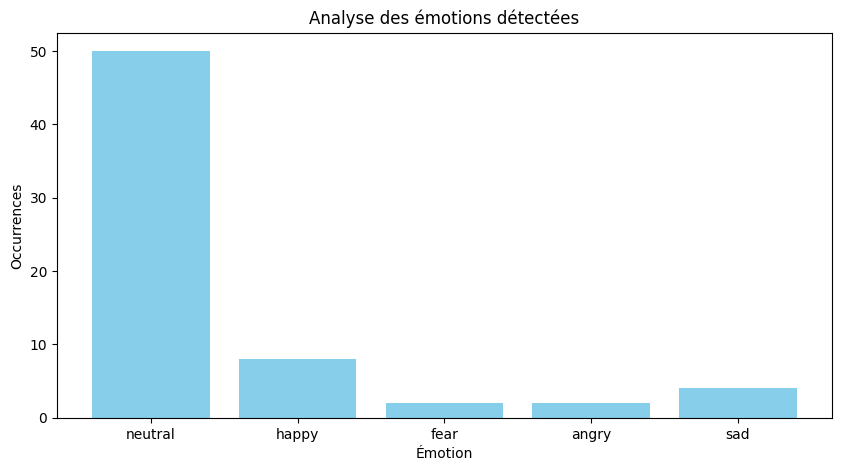

In [29]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt
from collections import Counter

# Charger la vidéo
video_path = "ww.mp4"
cap = cv2.VideoCapture(video_path)

frame_count = 0
emotion_list = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % 30 == 0:  # 1 frame/seconde si 30 fps
        try:
            result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
            dominant = result[0]['dominant_emotion']
            emotion_list.append(dominant)
            print(f"🧠 Emotion détectée à {frame_count//30}s : {dominant}")
        except Exception as e:
            print("Erreur :", e)
            emotion_list.append("unknown")

    frame_count += 1

cap.release()

# Analyse statistique
emotion_counts = Counter(emotion_list)
print("\n📊 Résumé des émotions :")
for emotion, count in emotion_counts.items():
    print(f"{emotion}: {count} fois")

# Visualisation
plt.figure(figsize=(10,5))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue')
plt.title("Analyse des émotions détectées")
plt.xlabel("Émotion")
plt.ylabel("Occurrences")
plt.show()


In [30]:
score_facial = 0
for emotion in emotion_list:
    if emotion in ["happy", "surprise"]:
        score_facial += 1

score_facial_percent = (score_facial / len(emotion_list)) * 100
print(f"🧮 Score émotion positif : {score_facial_percent:.2f}%")


🧮 Score émotion positif : 12.12%


In [31]:
score_final = (score_facial / len(emotions)) * 50 + (score_tech / len(mots_techniques)) * 50
print(f"🎯 Score global : {score_final:.2f} / 100")

if score_final >= 60:
    print("✅ Candidat ACCEPTÉ")
else:
    print("❌ Candidat REFUSÉ")


🎯 Score global : 6.78 / 100
❌ Candidat REFUSÉ
